# Partitional unsupervised learning models

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# 1. Prepare Data

In [5]:
# Ubication of the file to load
path ='nci_var_filtered.csv'
data = pd.read_csv(path, sep='\t')
# Change the index from the numerical index to the column 'gene'
data = data.set_index('gene')
# Show first 5 lines ofthe final data
data.head(5)

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


In [6]:
# It is mandatory to transpose the dataframe to have column names as headers
data = data.T
# Show first 5 lines ofthe final data
data.head(5)

gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,...,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
786-0,-1.025477,-1.409323,-1.696062,1.978677,0.878385,-0.354923,-0.809323,1.419631,0.369015,-0.128523,...,0.266154,0.002246,0.482123,0.605908,2.007554,-0.359754,-0.193538,-0.565677,-0.243108,0.456292
A498,-0.925477,-1.409323,-1.686062,1.588677,0.178385,-0.184923,-0.389323,1.779631,0.249015,-0.198523,...,0.106154,0.042246,0.092123,-0.384092,1.227554,0.770246,0.386462,-0.705677,-0.233108,-0.113708
A549,0.274523,-1.409323,-1.686062,0.908677,1.658385,-0.074923,0.880677,0.809631,0.649015,0.381477,...,0.366154,-0.627754,-0.047877,0.405908,2.227554,0.040246,0.616462,-0.775677,-0.243108,-0.433708
ACHN,-0.875477,-1.409323,-1.686062,0.348677,-0.291615,-0.014923,-0.809323,1.179631,-0.500985,-1.038523,...,0.266154,0.092246,0.192123,-0.854092,0.947554,-0.259754,-0.533538,-1.125677,-1.633108,-0.203708
BT-549,2.484523,-1.409323,-1.696062,1.098677,-0.011615,-2.114923,-0.809323,1.379631,-0.630985,-1.168523,...,0.306154,0.702246,0.752123,0.465908,0.887554,-0.199754,-0.083538,-0.785677,-0.773108,0.586292


In [7]:
# Gettng a list of all genes by retrieving column names from our data
genes = list(data.columns.values)
genes

['A1BG',
 'A2M',
 'A2ML1',
 'A4GALT',
 'AAAS',
 'AACS',
 'AADAC',
 'AAED1',
 'AAGAB',
 'AAMP',
 'AAR2',
 'AARS',
 'AARS2',
 'AASDH',
 'AASDHPPT',
 'AATK',
 'ABAT',
 'ABCA2',
 'ABCA3',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCB10',
 'ABCB11',
 'ABCB8',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCD1',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG4',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD13',
 'ABHD14A',
 'ABHD14B',
 'ABHD15',
 'ABHD17A',
 'ABHD17B',
 'ABHD17C',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD8',
 'ABI1',
 'ABI2',
 'ABI3',
 'ABO',
 'ABRA',
 'ABRACL',
 'ABT1',
 'ABTB1',
 'ACAA1',
 'ACAA2',
 'ACAD10',
 'ACAD8',
 'ACAD9',
 'ACADL',
 'ACADM',
 'ACADS',
 'ACADSB',
 'ACADVL',
 'ACAP2',
 'ACAP3',
 'ACAT1',
 'ACAT2',
 'ACBD3',
 'ACBD4',
 'ACBD5',
 'ACBD7',
 'ACCS',
 'ACCSL',
 'ACD',
 'ACE',
 'ACE2',
 'ACIN1',
 'ACLY',
 'ACMSD',
 'ACO1',
 'ACO2',
 'ACOT12',
 'ACOT13',
 'ACOT4',
 'ACOT7',
 'ACOT8',
 'ACOX1',
 'ACOX2',
 'ACP1'

In [8]:
print('The shape of our data is:', data.shape)
data.describe()

The shape of our data is: (60, 9994)


gene,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AAED1,AAGAB,AAMP,...,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.508190,-0.457656,-1.573562,-0.079323,0.607551,-0.247923,-0.663990,0.501797,0.013349,-0.186690,...,0.080154,-0.033921,0.229956,0.421741,1.219054,-0.097587,0.066295,-0.347177,-0.337274,0.226292
std,1.073057,2.113886,0.491603,1.527735,0.698374,0.677511,0.388864,0.948635,0.449513,0.685752,...,0.634033,0.684767,0.458151,0.674010,0.508006,0.558743,0.627380,0.528663,0.729063,0.554981
min,-1.025477,-1.409323,-1.696062,-2.241323,-1.071615,-2.114923,-0.809323,-2.480369,-0.820985,-2.068523,...,-1.153846,-1.547754,-0.617877,-1.234092,-0.022446,-1.389754,-2.013538,-1.475677,-2.603108,-1.153708
25%,-0.675477,-1.399323,-1.696062,-1.581323,0.135885,-0.652423,-0.809323,0.097131,-0.380985,-0.518523,...,-0.386346,-0.517754,-0.067877,-0.039092,0.895054,-0.384754,-0.238538,-0.723177,-0.693108,-0.213708
50%,0.584523,-1.369323,-1.696062,-0.021323,0.798385,-0.264923,-0.809323,0.654631,0.079015,-0.123523,...,0.086154,-0.002754,0.197123,0.450908,1.257554,-0.129754,0.046462,-0.335677,-0.223108,0.336292
75%,1.414523,-1.196823,-1.636062,1.126177,1.110885,0.145077,-0.779323,1.182131,0.301515,0.181477,...,0.426154,0.414746,0.484623,0.883408,1.577554,0.192746,0.413962,0.069323,0.066892,0.643792
max,2.754523,6.620677,1.733938,3.008677,1.968385,1.395077,0.880677,1.949631,0.939015,1.281477,...,1.636154,1.472246,1.372123,1.775908,2.227554,1.870246,1.666462,0.694323,1.366892,1.166292


In [9]:
# In order to scale the data, execute next two lines
# scaler = StandardScaler()
# data = scaler.fit_transform(data.values)
# As I got worse results by scaling the data, I have done with out it.
data = data.values

# 2. Partitional Clustering

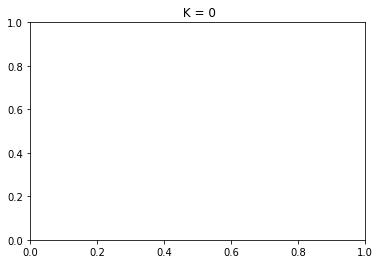

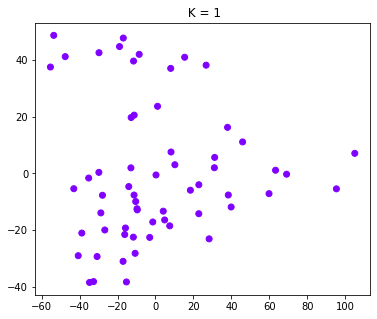

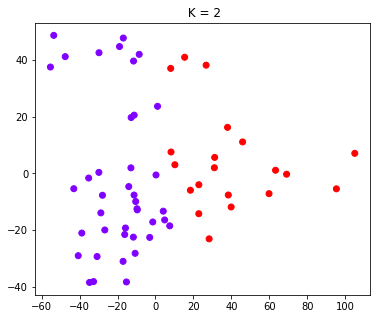

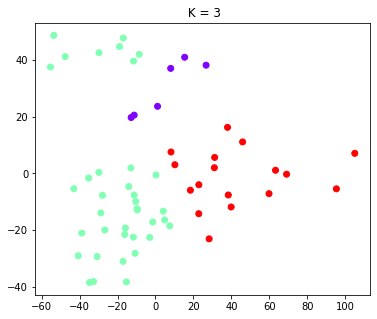

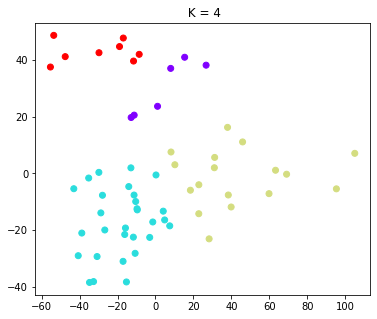

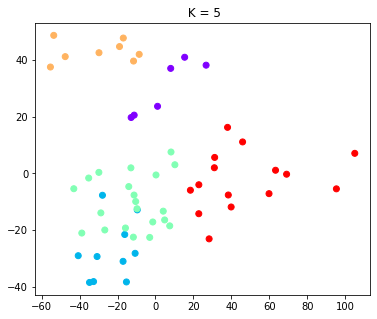

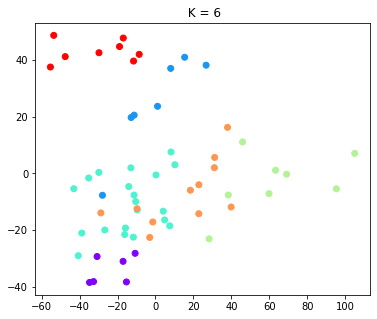

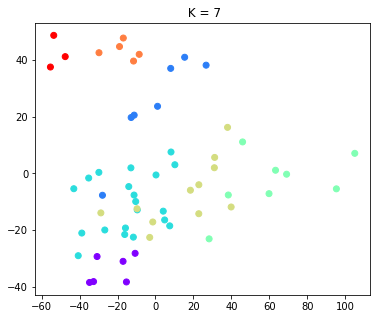

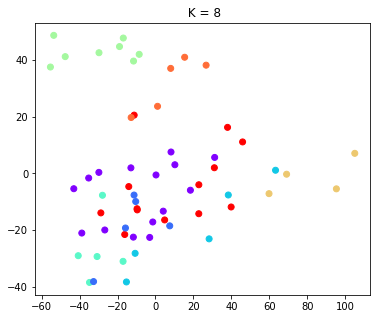

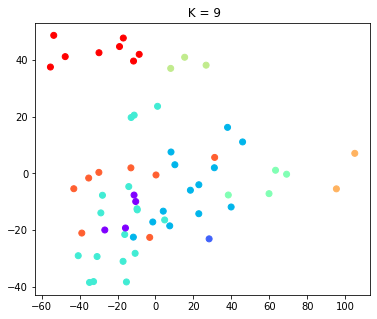

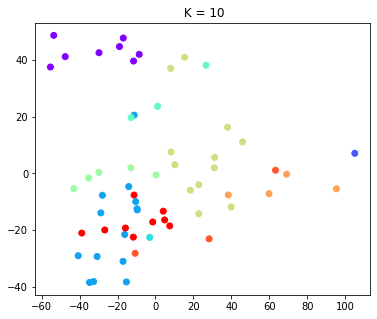

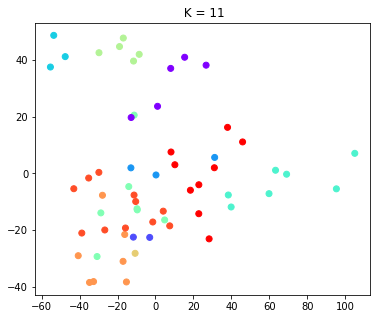

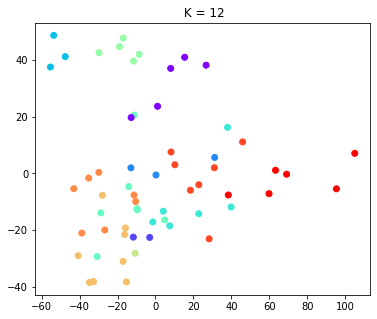

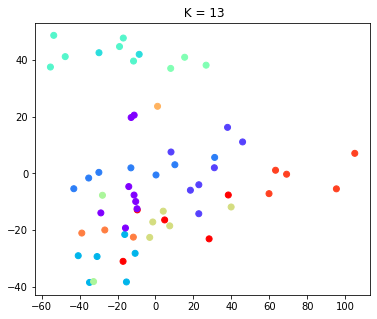

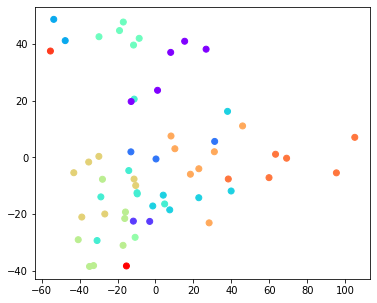

In [10]:
# Choosing the appropiate number of clusters (k) between 1 and 15
sse=[]  #Sum of Square errors
num_iter_needed = []
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.fit_transform(data)
for k in range(1,  15):
    # Instanciate Kmeans class
    kmeans = KMeans(
        init="random",
        n_clusters=k,       # Number of clusters
        n_init=10,          # Number of initializations to perform
        max_iter=30,       # Maximum number of iterations for each initialization
        random_state=125    # For obtaining always same results
        )
    # Time to train the model
    kmeans.fit(data)
    # Add to array the lowest sse
    sse.append(kmeans.inertia_)
    # Add to the array number of iterations needed to converge
    num_iter_needed.append(kmeans.n_iter_)
    if k >0: 
        plt.title(f' K = {k-1}')
        plt.figure(figsize=(6, 5))
        plt.scatter(reduced_data[:,0],reduced_data[:,1], c=kmeans.labels_, cmap='rainbow') 

### There are two common methods to evaluate the appropiate number of clusters:
### 1. The elbow method


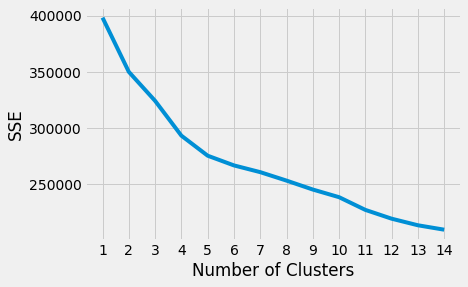

In [11]:
# Let's plot the SSE curve to find out elbow point
plt.style.use("fivethirtyeight")
plt.plot(range(1,  15), sse)
plt.xticks(range(1,  15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [12]:
# As I am not sure at all of which point, I will use KneeLocator to be completely sure
kl = KneeLocator(
    range(1,  15), sse, curve="convex", direction="decreasing"
    )
print("Elbow point of the plot is in", kl.elbow)

Elbow point of the plot is in 5


### 2. Silhouette coefficient 

In [13]:
# Choosing the appropiate number of clusters (k) between 1 and 15
silhouette_coefficients=[]  
for k in range(2,  15):
    # Instanciate Kmeans class
    kmeans = KMeans(
        init="random",
        n_clusters=k,       # Number of clusters
        n_init=10,          # Number of initializations to perform
        max_iter=300,       # Maximum number of iterations for each initialization
        random_state=125    # For obtaining always same results
        )
    # Time to train the model
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

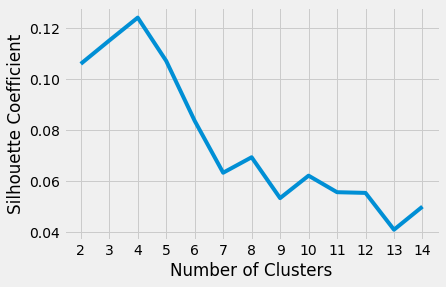

[0.1059269847947481, 0.11505061311874441, 0.12401068831222833, 0.10707634716330212, 0.08364716286224687, 0.06333540003700337, 0.06938459355304159, 0.05339770154590176, 0.06218674399450122, 0.055717648129884514, 0.05544480447352928, 0.04104930714026018, 0.0500772111177683]
The highest Silhouette score is:  0.12401068831222833 and it is found at k =  4


In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,  15), silhouette_coefficients)
plt.xticks(range(2,  15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
print(silhouette_coefficients)
print("The highest Silhouette score is: ", np.max(silhouette_coefficients), "and it is found at k = ", silhouette_coefficients.index(np.max(silhouette_coefficients))+2)

### 3. Analyse the results
#### 3.1. k = 4

In [15]:
data = pd.read_csv(path, sep='\t')
data = data.set_index('gene')
data = data.T

data.iloc[[0]]
kmeans = KMeans(
        init="random",
        n_clusters=4,       # Number of clusters
        n_init=10,          # Number of initializations to perform
        max_iter=300,       # Maximum number of iterations for each initialization
        random_state=125    # For obtaining always same results
        )
kmeans.fit(data.values)
cont = 0
sol =[[], [], [], []]
for i in range (0, data.shape[0]):
    X_new = np.array(data.iloc[[i]]) 
    new_labels = kmeans.predict(X_new)
    sol[new_labels[0]].append(i)
for o in range (0, len(sol)):
    print("Cluster ", o, " has ", len(sol[o]), " elems.")
    print("This are: ", sol[o])

Cluster  0  has  6  elems.
This are:  [6, 13, 19, 28, 40, 52]
Cluster  1  has  29  elems.
This are:  [0, 1, 2, 4, 5, 9, 11, 15, 18, 25, 29, 30, 31, 32, 35, 36, 37, 38, 39, 41, 42, 43, 44, 48, 51, 53, 54, 55, 59]
Cluster  2  has  17  elems.
This are:  [3, 7, 8, 10, 12, 14, 16, 17, 20, 21, 24, 27, 33, 34, 49, 50, 56]
Cluster  3  has  8  elems.
This are:  [22, 23, 26, 45, 46, 47, 57, 58]


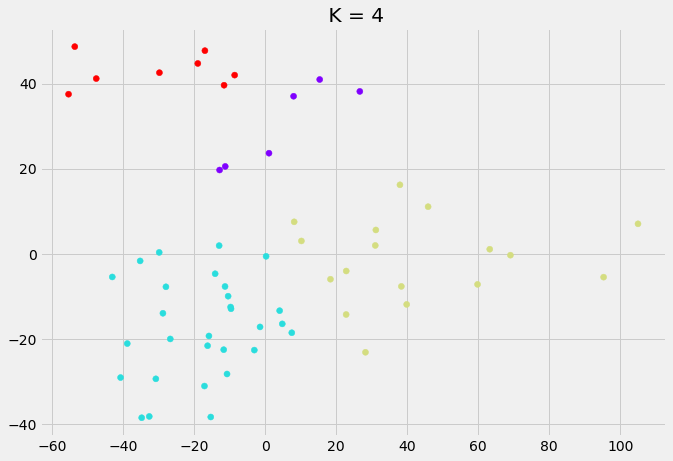

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.title(f' K = 4')
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=kmeans.labels_, cmap='rainbow') 

#### 3.2. k = 5

In [17]:
data = pd.read_csv(path, sep='\t')
data = data.set_index('gene')
data = data.T

data.iloc[[0]]
kmeans = KMeans(
        init="random",
        n_clusters=5,       # Number of clusters
        n_init=10,          # Number of initializations to perform
        max_iter=300,       # Maximum number of iterations for each initialization
        random_state=125    # For obtaining always same results
        )
kmeans.fit(data.values)
cont = 0
sol =[[], [], [], [], []]
for i in range (0, data.shape[0]):
    X_new = np.array(data.iloc[[i]]) 
    new_labels = kmeans.predict(X_new)
    sol[new_labels[0]].append(i)
for o in range (0, len(sol)):
    print("Cluster ", o, " has ", len(sol[o]), " elems.")
    print("This are: ", sol[o])

Cluster  0  has  6  elems.
This are:  [6, 13, 19, 28, 40, 52]
Cluster  1  has  10  elems.
This are:  [2, 9, 11, 32, 35, 36, 37, 48, 53, 54]
Cluster  2  has  21  elems.
This are:  [0, 1, 4, 5, 15, 18, 25, 29, 30, 31, 38, 39, 41, 42, 43, 44, 50, 51, 55, 56, 59]
Cluster  3  has  8  elems.
This are:  [22, 23, 26, 45, 46, 47, 57, 58]
Cluster  4  has  15  elems.
This are:  [3, 7, 8, 10, 12, 14, 16, 17, 20, 21, 24, 27, 33, 34, 49]


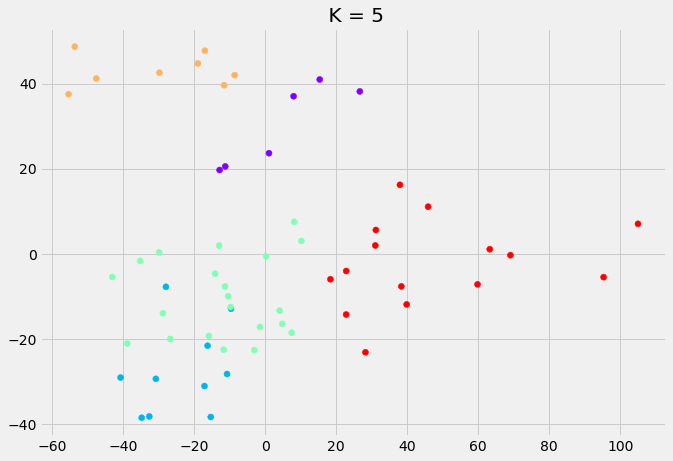

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.values)
reduced_data = pca.fit_transform(data.values)
plt.figure(figsize=(10, 7))
plt.title(f' K = 5')
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=kmeans.labels_, cmap='rainbow') 

#### 3.3. Number of iterarions needed per number of cluster

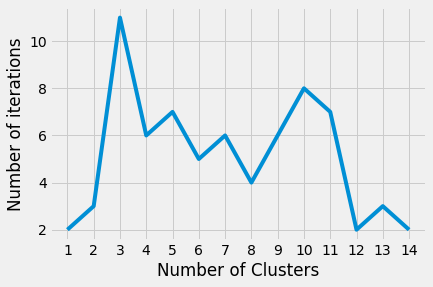

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,  15), num_iter_needed)
plt.xticks(range(1,  15))
plt.xlabel("Number of Clusters")
plt.ylabel("Number of iterations")
plt.show()

#### 3.4. Silhouette plot

For n_clusters = 4 The average silhouette_score is : 0.12401068831222833
For n_clusters = 5 The average silhouette_score is : 0.10707634716330212


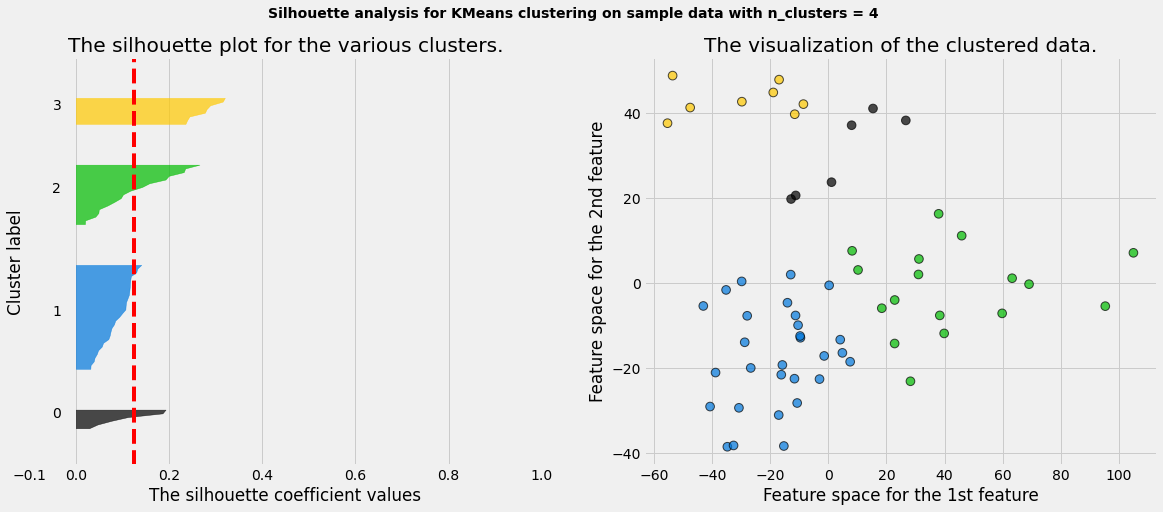

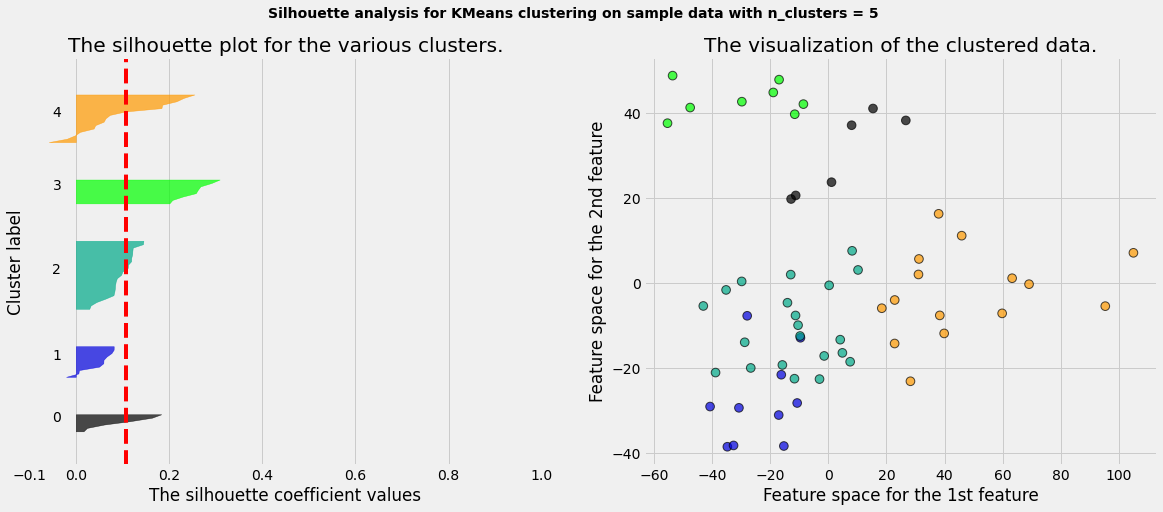

In [32]:


for n_clusters in [4,5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data.values) + (n_clusters + 1) * 10])

    kmeans = KMeans(
        init="random",
        n_clusters=n_clusters,      # Number of clusters
        n_init=10,                  # Number of initializations to perform
        max_iter=300,               # Maximum number of iterations for each initialization
        random_state=125            # For obtaining always same results
        )    
    cluster_labels = kmeans.fit_predict(data.values)

    
    silhouette_avg = silhouette_score(data.values, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(data.values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    reduced_data = pca.fit_transform(data.values)
    ax2.scatter(
        reduced_data[:, 0], reduced_data[:, 1], marker=".", s=300, lw=1, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Bibliography
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://moodle.upm.es/titulaciones/oficiales/pluginfile.php/10086046/mod_resource/content/2/Unit3.3-UnsupervisedLearning-PartitionalClustering.pdf

https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php

https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe

https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

https://stackoverflow.com/questions/56590861/kneed-installation-issue-modulenotfounderror-no-module-named-kneed

https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

https://realpython.com/k-means-clustering-python/

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html